Loaded 447 entries
Calculating entropies...
Creating plots...


/var/folders/rz/_cb3hkpx005f_j2_81th4pqr0000gn/T/ipykernel_65480/485983608.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/rz/_cb3hkpx005f_j2_81th4pqr0000gn/T/ipykernel_65480/485983608.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax5.boxplot(data_to_plot, labels=labels, patch_artist=True)


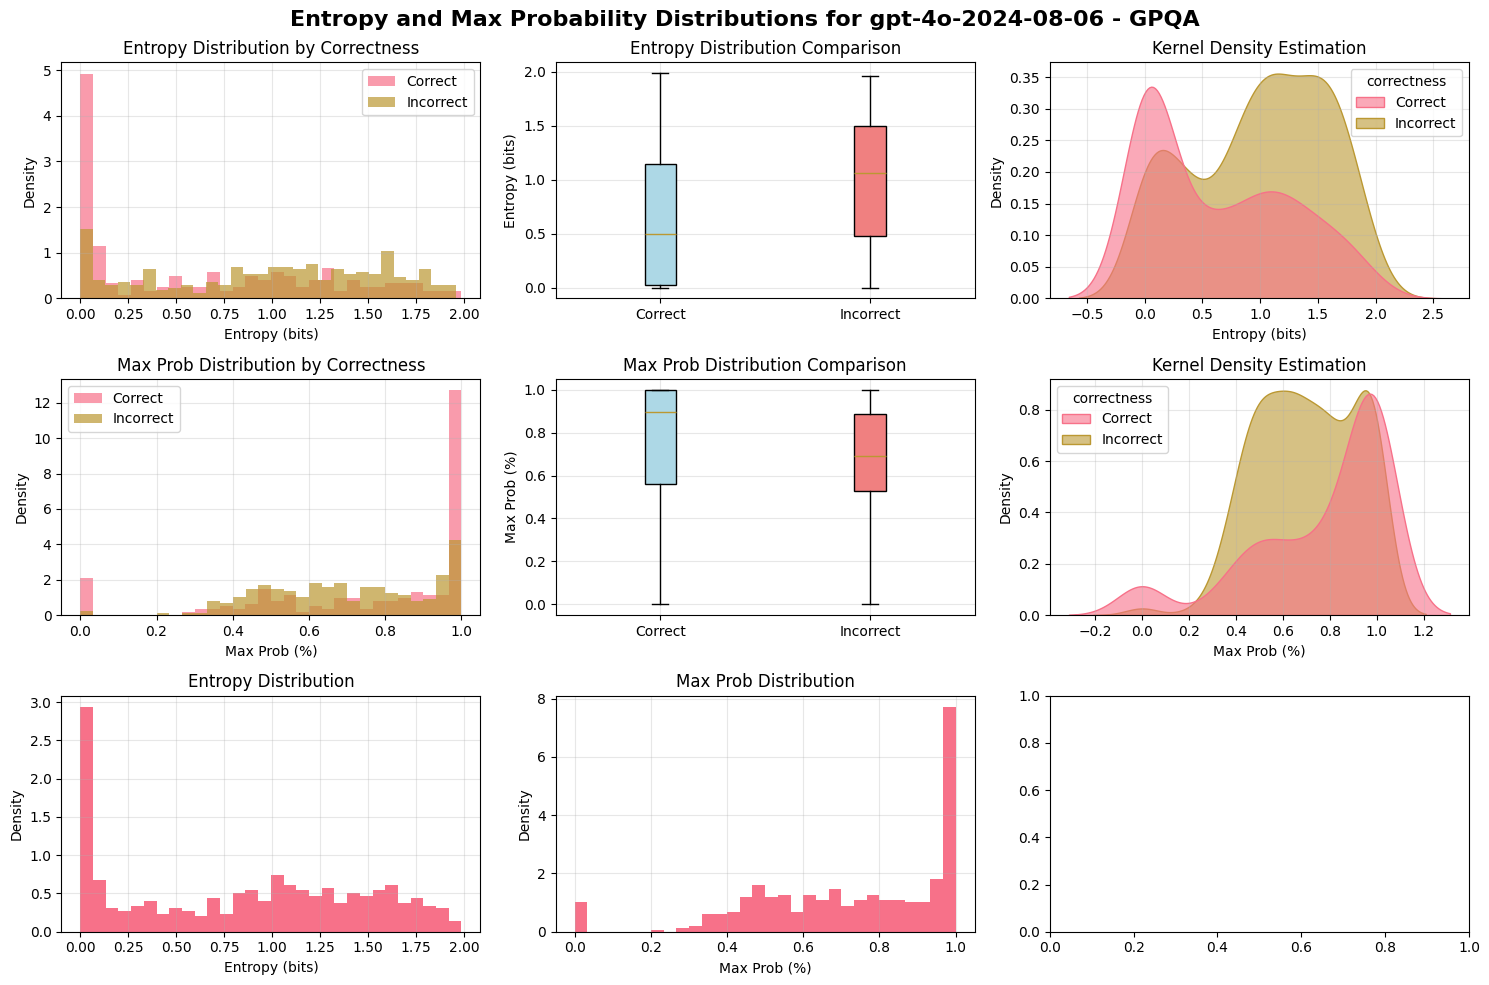

Loaded 500 entries
Calculating entropies...
Creating plots...


/var/folders/rz/_cb3hkpx005f_j2_81th4pqr0000gn/T/ipykernel_65480/485983608.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/rz/_cb3hkpx005f_j2_81th4pqr0000gn/T/ipykernel_65480/485983608.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax5.boxplot(data_to_plot, labels=labels, patch_artist=True)


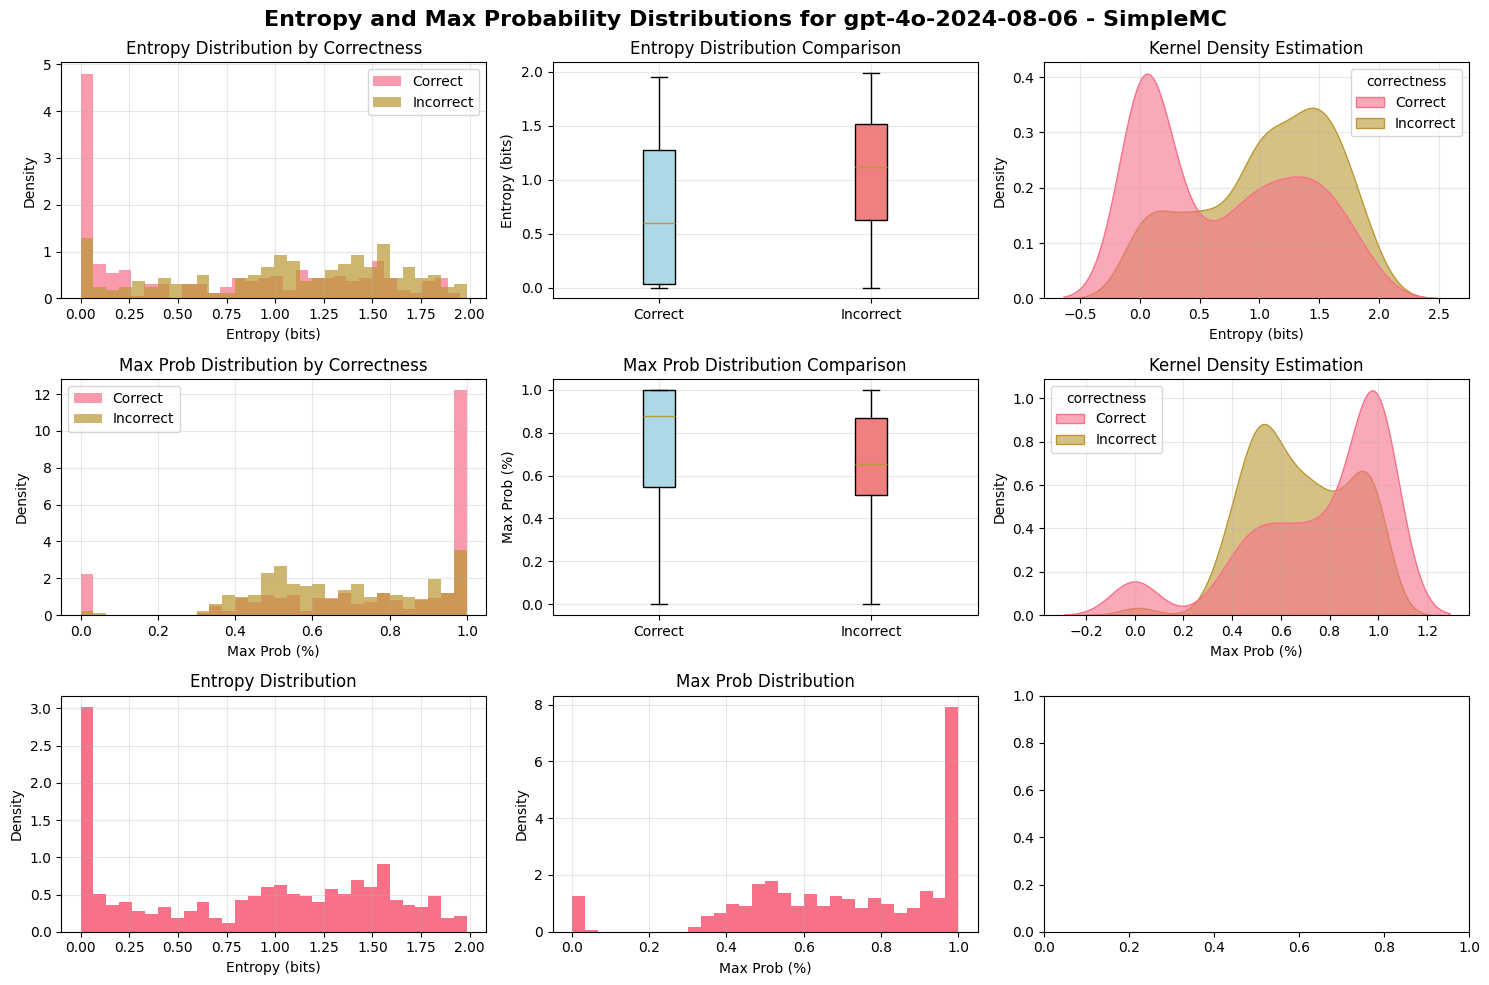

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from collections import defaultdict
import pandas as pd

def calculate_entropy(probs_dict):
    """Calculate entropy for a probability distribution."""
    # Convert probabilities to numpy array
    probs = np.array(list(probs_dict.values()))
    
    # Remove zero probabilities to avoid log(0)
    probs = probs[probs > 0]
    
    # Calculate entropy: -sum(p * log(p))
    return entropy(probs, base=2)  # Using base 2 for bits

def extract_entropies_by_correctness(results):
    """Extract entropies grouped by is_correct status."""
    entropies, entropies_correct, entropies_incorrect = [], [], []
    max_probs, max_probs_correct, max_probs_incorrect = [], [], []
    
    for entry_id, entry_data in results.items():
        # Calculate entropy for this entry's probability distribution
        prob_entropy = calculate_entropy(entry_data['probs'])

        #max probability
        max_prob = max(entry_data['probs'].values())
        
        entropies.append(prob_entropy)
        max_probs.append(max_prob)

        if entry_data['is_correct']:
            entropies_correct.append(prob_entropy)
            max_probs_correct.append(max_prob)
        else:
            entropies_incorrect.append(prob_entropy)
            max_probs_incorrect.append(max_prob)
    
    return {"max_probs": max_probs, "max_probs_correct": max_probs_correct, "max_probs_incorrect": max_probs_incorrect, "entropies": entropies, "entropies_correct": entropies_correct, "entropies_incorrect": entropies_incorrect}

def plot_entropy_distributions(dict_of_lists, title):
    
    n_bins=30

    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create figure with subplots
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 10))
    
    # Plot 1: Overlapping histograms
    ax1.hist(dict_of_lists['entropies_correct'], bins=n_bins, alpha=0.7, label='Correct', density=True)
    ax1.hist(dict_of_lists['entropies_incorrect'], bins=n_bins, alpha=0.7, label='Incorrect', density=True)
    ax1.set_xlabel('Entropy (bits)')
    ax1.set_ylabel('Density')
    ax1.set_title('Entropy Distribution by Correctness')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax4.hist(dict_of_lists['max_probs_correct'], bins=n_bins, alpha=0.7, label='Correct', density=True)
    ax4.hist(dict_of_lists['max_probs_incorrect'], bins=n_bins, alpha=0.7, label='Incorrect', density=True)
    ax4.set_xlabel('Max Prob (%)')
    ax4.set_ylabel('Density')
    ax4.set_title('Max Prob Distribution by Correctness')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Plot 2: Box plots
    data_to_plot = [dict_of_lists['entropies_correct'], dict_of_lists['entropies_incorrect']]
    labels = ['Correct', 'Incorrect']
    box_plot = ax2.boxplot(data_to_plot, labels=labels, patch_artist=True)
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)    
    ax2.set_ylabel('Entropy (bits)')
    ax2.set_title('Entropy Distribution Comparison')
    ax2.grid(True, alpha=0.3)
    data_to_plot = [dict_of_lists['max_probs_correct'], dict_of_lists['max_probs_incorrect']]
    box_plot = ax5.boxplot(data_to_plot, labels=labels, patch_artist=True)
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)    
    ax5.set_ylabel('Max Prob (%)')
    ax5.set_title('Max Prob Distribution Comparison')
    ax5.grid(True, alpha=0.3)
    
    # Plot 3: Density plots using seaborn
    df_correct = pd.DataFrame({
        'entropy': dict_of_lists['entropies_correct'],
        'correctness': 'Correct'
    })
    df_incorrect = pd.DataFrame({
        'entropy': dict_of_lists['entropies_incorrect'],
        'correctness': 'Incorrect'
    })
    df_combined = pd.concat([df_correct, df_incorrect])    
    sns.kdeplot(data=df_combined, x='entropy', hue='correctness', ax=ax3, fill=True, alpha=0.6)
    ax3.set_xlabel('Entropy (bits)')
    ax3.set_ylabel('Density')
    ax3.set_title('Kernel Density Estimation')
    ax3.grid(True, alpha=0.3)
    df_correct = pd.DataFrame({
        'max_prob': dict_of_lists['max_probs_correct'],
        'correctness': 'Correct'
    })
    df_incorrect = pd.DataFrame({
        'max_prob': dict_of_lists['max_probs_incorrect'],
        'correctness': 'Incorrect'
    })
    df_combined = pd.concat([df_correct, df_incorrect])    
    sns.kdeplot(data=df_combined, x='max_prob', hue='correctness', ax=ax6, fill=True, alpha=0.6)
    ax6.set_xlabel('Max Prob (%)')
    ax6.set_ylabel('Density')
    ax6.set_title('Kernel Density Estimation')
    ax6.grid(True, alpha=0.3)
    
    ax7.hist(dict_of_lists['entropies'], bins=n_bins, density=True)
    ax7.set_xlabel('Entropy (bits)')
    ax7.set_ylabel('Density')
    ax7.set_title('Entropy Distribution')
    ax7.grid(True, alpha=0.3)
    ax8.hist(dict_of_lists['max_probs'], bins=n_bins, density=True)
    ax8.set_xlabel('Max Prob (%)')
    ax8.set_ylabel('Density')
    ax8.set_title('Max Prob Distribution')
    ax8.grid(True, alpha=0.3)

    fig.suptitle(f'Entropy and Max Probability Distributions for {title}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def print_summary_statistics(entropies_correct, entropies_incorrect):
    """Print summary statistics for both groups."""
    print("=== ENTROPY ANALYSIS SUMMARY ===")
    print(f"\nCorrect Answers (n={len(entropies_correct)}):")
    print(f"  Mean: {np.mean(entropies_correct):.4f}")
    print(f"  Std:  {np.std(entropies_correct):.4f}")
    print(f"  Min:  {np.min(entropies_correct):.4f}")
    print(f"  Max:  {np.max(entropies_correct):.4f}")
    print(f"  Median: {np.median(entropies_correct):.4f}")
    
    print(f"\nIncorrect Answers (n={len(entropies_incorrect)}):")
    print(f"  Mean: {np.mean(entropies_incorrect):.4f}")
    print(f"  Std:  {np.std(entropies_incorrect):.4f}")
    print(f"  Min:  {np.min(entropies_incorrect):.4f}")
    print(f"  Max:  {np.max(entropies_incorrect):.4f}")
    print(f"  Median: {np.median(entropies_incorrect):.4f}")
    
    # Statistical test for difference in means
    from scipy.stats import ttest_ind
    t_stat, p_value = ttest_ind(entropies_correct, entropies_incorrect)
    print(f"\nT-test for difference in means:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

models = ['gpt-4o-2024-08-06']
for model_name in models:
    for dataset in ['GPQA', 'SimpleMC']:
        if dataset == 'SimpleMC': file_path = f'compiled_results_smc/{model_name}_phase1_compiled.json'
        else: file_path = f'completed_results_gpqa/{model_name}_phase1_completed.json'

        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            results = data['results']
            print(f"Loaded {len(results)} entries")
            
            # Extract entropies by correctness
            print("Calculating entropies...")
            stats_dict = extract_entropies_by_correctness(results)

            
            # Create visualizations
            print("Creating plots...")
            plot_entropy_distributions(stats_dict, f'{model_name} - {dataset}')
            
        except FileNotFoundError:
            print(f"Error: Could not find file '{file_path}'")
            print("Please update the file_path variable with the correct path to your JSON file")
        except KeyError as e:
            print(f"Error: Expected key not found in JSON structure: {e}")
            print("Please check that your JSON has the expected 'results' structure")
        except Exception as e:
            print(f"An error occurred: {e}")


In [6]:
entropy([.25,.25,.25,.25])

np.float64(1.3862943611198906)